In [51]:
import numpy as np
import matplotlib.pyplot as plt
import h5py
import corner

In [52]:
file1 = h5py.File('../output/210717-194620_M-I2-A1.h5', 'r')
file2 = h5py.File('../output/210717-194807_M-I2-A2.h5', 'r')
file3 = h5py.File('../code/210720-121256_M-I2-C1.h5', 'r')
file4 = h5py.File('../code/210720-123251_M-I3-B1.h5', 'r')
file5 = h5py.File('../code/210720-123459_M-I4-B1.h5', 'r')


In [66]:
file1 = file3
file2 = file4


chain1 = np.array(file1.get('mcmc').get('chain'))
chain2 = np.array(file2.get('mcmc').get('chain'))

nsteps1 = np.where(chain1[:,0,2]==0)[0][0]
nsteps2 = np.where(chain2[:,0,2]==0)[0][0]

chain1 = np.array(file1.get('mcmc').get('chain'))[:nsteps1]
chain2 = np.array(file2.get('mcmc').get('chain'))[:nsteps2]

prob1 = np.array(file1.get('mcmc').get('log_prob'))
prob2 = np.array(file2.get('mcmc').get('log_prob'))

accepted1 = np.array(file1.get('mcmc').get('accepted'))
accepted2 = np.array(file2.get('mcmc').get('accepted'))

In [67]:
chain1.shape

(208, 16, 3)

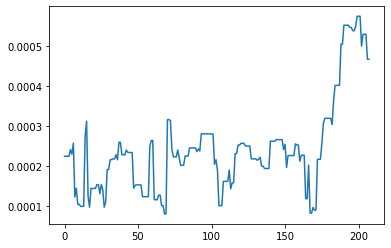

In [68]:
plt.plot(chain1[:,0,0])

In [69]:
burnin = 200

chain1_flat = chain1[burnin:,:,:].reshape((nsteps1-burnin)*16,3)
chain2_flat = chain2[burnin:,:,:].reshape((nsteps2-burnin)*16,3)
chain_flat = np.concatenate((chain1_flat,chain2_flat),axis=0)

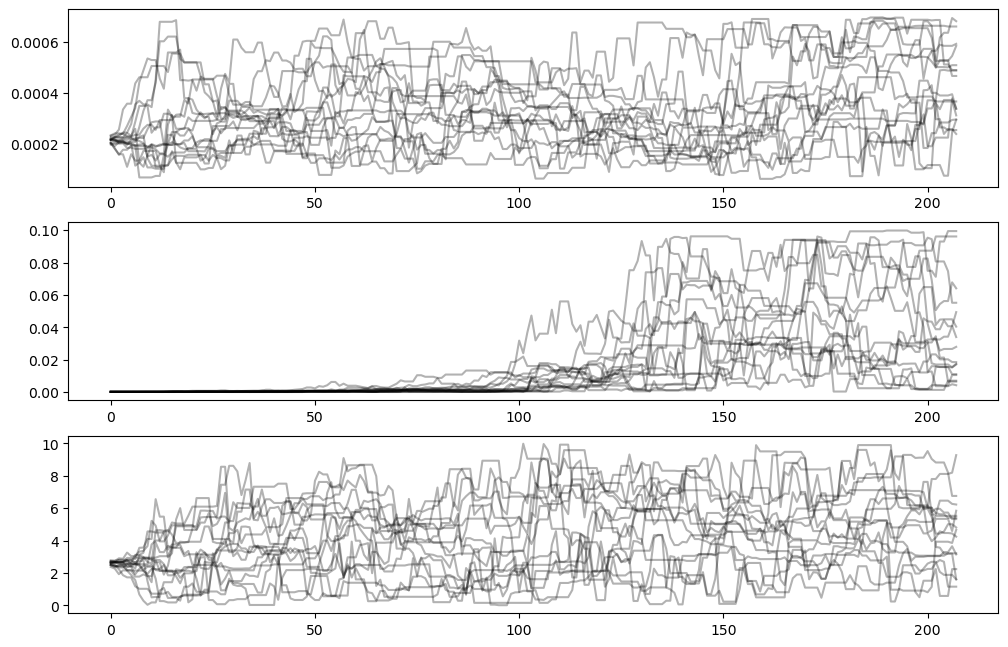

In [70]:
fig, ax = plt.subplots(3,1,figsize=(12,8),dpi=100)
for i in range(3):
    for j in range(16):
        ax[i].plot(chain1[:1450,j,i],c='k',alpha=0.3)

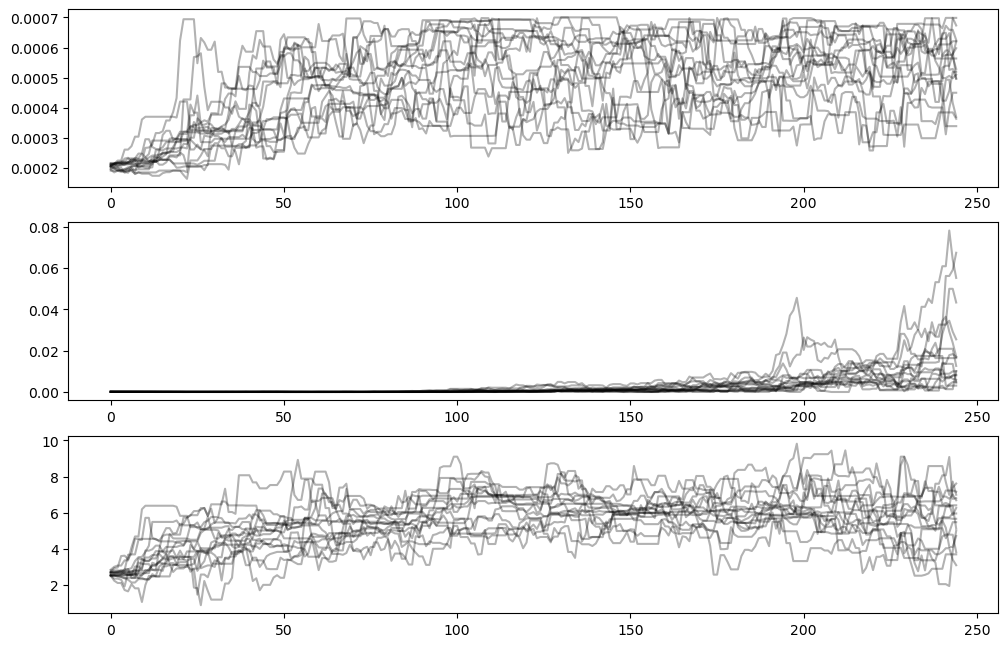

In [71]:
fig, ax = plt.subplots(3,1,figsize=(12,8),dpi=100)
for i in range(3):
    for j in range(16):
        ax[i].plot(chain2[:1450,j,i],c='k',alpha=0.3)
        

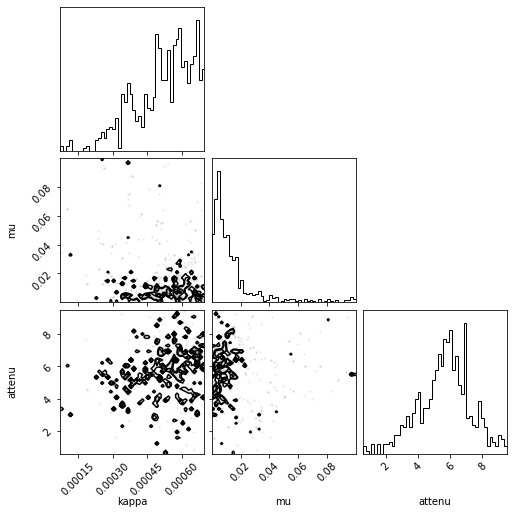

In [72]:
fig = corner.corner(
    chain_flat, labels=['kappa','mu','attenu'],bins=50)

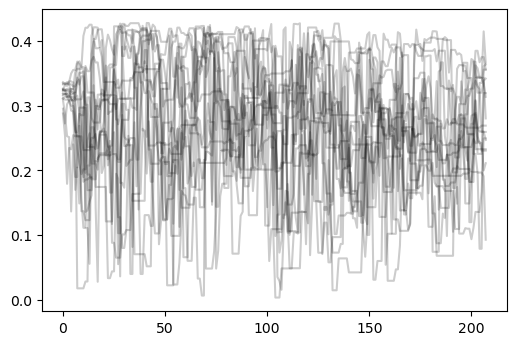

In [73]:
fig, ax = plt.subplots(dpi=100)
ax.plot(np.exp(prob1[:nsteps1]),c='k',alpha=0.2)

plt.show()

In [40]:
l1 = file1.get('mcmc').get

In [42]:
l1.keys()

<KeysViewHDF5 ['accepted', 'chain', 'log_prob']>